# Coding Assignment #1

You will implement learning algorithms for predicition.
You are free to utilize any off-the-shelf software of your choice (scikit learn, TensorFlow, etc.). You may need to use multiple libraries and packages.

This initial assignment is intended to be straightforward. Components of this assignment will be built upon in the next assignment by extending the prediction model to include text data.



## Objectives

Implementing machine learning algorithms using real-world data.

Select features or characteristics from data to improve a learner's performance.

Interpretation and explanation of results.



# Algorithms To Implement

You are not expected to adjust parameters of the model that were not discussed.


## Linear Regression

See <https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares>


## Neural Network

See <https://scikit-learn.org/stable/modules/neural_networks_supervised.html>
or <https://www.tensorflow.org/tutorials/keras/regression>


## Support Vector Machine

See <https://scikit-learn.org/stable/modules/svm.html#svm-regression>


## Ensemble Model (Bagging)

See <https://scikit-learn.org/stable/modules/ensemble.html#bagging>


## Ensemble Model (Random Forest)

See <https://scikit-learn.org/stable/modules/ensemble.html#forest>



# Data

You may select from the following datasets:

**Student Performance**
<https://archive.ics.uci.edu/ml/datasets/Student+Performance#>

**Wisconsin Breast Cancer Database**
<https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin>




## Training & Testing Sets

Partition the data into a training set and a test set.

The models will be trained using cross-validation.




# Evaluation

Train the models using the training data. Evaluate and compare the models on the test set.

For the **Student Performance** dataset you will be prediciting a student's grade in a Math course or a Portuguese course.

For the **Wisconsin Breast Cancer Database** you will classify the examples as either **benign** or **malignant**.



# What To Submit: Summary Report

You will submit your work in a Jupyter notebook (a .ipynb file).

Explain why each model resulted in the performance it obtained.

Explain how each model's performance could be improved.

Summarize any other aspects involved in performing this evaluation where there were noticeable differences between the models.

Your summary will discuss various expectations based on the attributes available that were used as features.


### Tables, Plots, & Graphs

A visual presentation of results is required.

# Solution

# Objective

Summarize the task.

# Algorithms


## Linear Regression

Your code here.


---Linear Regression---

***DATA TYPES***
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
***done***


***PREPROCESS***
ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['sex', 'address', 'famsize',

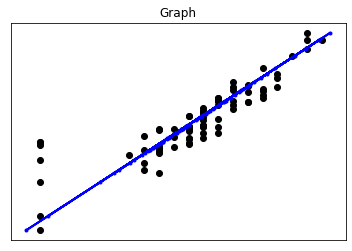

In [12]:
print('---Linear Regression---\n')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# read data from csv using pandas
myData = pd.read_csv('/Users/asifh/Documents/cmpt310/Coding_Assignment_#1/Data/Student-Data/student-mat.csv', sep=';')
print('***DATA TYPES***')
print(myData.dtypes)
print('***done***\n\n')

# seperate catagoric & numeric columns
cat_cols = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
##print('***CATAGORIC COLUMNS***')
##print(cat_cols)
##print('***done***\n')
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
##print('***NUMERIC COLUMNS***')
##print(num_cols)
##print('***done***\n')

# one_hot_encode to preprocess catagoric & numeric data
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), cat_cols), (StandardScaler(), num_cols[:15]),
    remainder='passthrough'
)
print('***PREPROCESS***')
print(preprocessor)
print('***done***\n')

# select features
# all excluding G3
X = myData.iloc[:395, 1:32]
print('\n***FEATURES***')
print(X)
print('***done***\n')

# select target(s)
# G3
y = myData.iloc[:395, 32:33]
print('\n***TARGETS***')
print(y)
print('***done***\n')

# cross-validation
# 5-folds
cv = KFold(n_splits=5, shuffle=True)

# split training & testing sets
##print('\n***K-FOLD = 5***')
for train, test in cv.split(X, y=y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
##    print('\n***X_train, X_test***')
##    print(X_train,'\n', X_test)
##    print('\n***y_train, y_test***')
##    print(y_train, '\n', y_test)
##print('***done***\n')

# select learner model
# transform X to scalar
# fit data using training set
model = make_pipeline(preprocessor, TransformedTargetRegressor(
        regressor=LinearRegression())
        )
model.fit(X_train, y_train)

#transform X_test to scalar 
# predict & print G3
y_pred = model.predict(X_test)
print('\n*Prediction*')
print(y_pred)

# visualization of data
# mean squared error
print('\n*Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
# coefficient of determination/R2: 1 is perfect 
print('\n*R2 Score(Coefficient of determination): %.2f' % r2_score(y_test, y_pred))

# output plot
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_pred, y_pred, color='blue', marker='o', linewidth=2, markersize=3)

plt.title('Graph')
plt.xticks(())
plt.yticks(())

plt.show()



## Neural Network

Your code here.

---Neural Network (MLP Regressor)---

---Using student-mat.csv---

---Same Features & Target(s)---


*Prediction*
[[ 8.14495414]
 [14.3321341 ]
 [11.10531804]
 [14.71651745]
 [11.67499907]
 [11.52053192]
 [ 9.01800147]
 [17.73049786]
 [11.4660217 ]
 [14.47370218]
 [18.59376705]
 [ 8.24181702]
 [ 8.95889988]
 [10.04211927]
 [12.92120517]
 [ 8.94227038]
 [10.02937577]
 [15.46047251]
 [10.62510535]
 [ 3.48594824]
 [13.11519366]
 [10.1565698 ]
 [15.57011425]
 [ 9.88204093]
 [12.93718473]
 [15.83511529]
 [11.02225007]
 [ 7.63277329]
 [ 2.17105188]
 [ 0.25132548]
 [-3.6045444 ]
 [ 6.40885563]
 [11.17957855]
 [10.04185952]
 [14.92860188]
 [ 7.60332523]
 [ 1.82695636]
 [ 9.57939623]
 [10.4972524 ]
 [ 4.3723977 ]
 [ 4.99153922]
 [14.13178835]
 [15.31708061]
 [17.34220862]
 [10.24472894]
 [ 6.43657936]
 [12.75031496]
 [12.29406193]
 [ 7.04117543]
 [ 8.24420761]
 [12.77740755]
 [10.12052688]
 [ 8.36563149]
 [ 3.38209617]
 [ 6.08387699]
 [10.21334514]
 [ 9.31737528]
 [16.02495892]
 [ 8.32652778]
 

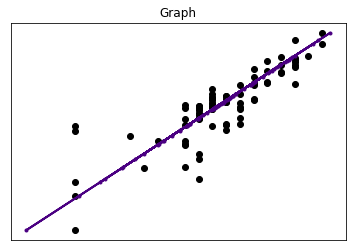

In [13]:
print('---Neural Network (MLP Regressor)---\n')
print('---Using student-mat.csv---\n')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# read data from csv using pandas
myData = pd.read_csv('/Users/asifh/Documents/cmpt310/Coding_Assignment_#1/Data/Student-Data/student-mat.csv', sep=';')

# seperate catagoric & numeric columns
cat_cols = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# one_hot_encode to preprocess catagoric & numeric data
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), cat_cols), (StandardScaler(), num_cols[:15]),
    remainder='passthrough'
)
##print(preprocessor)

print('---Same Features & Target(s)---\n')
# select features
# all excluding G3
X = myData.iloc[:395, 1:32]

# select target(s)
# G3
y = myData.iloc[:395, 32:33]

# cross-validation
# 5-folds
cv = KFold(n_splits=5, shuffle=True)  # better result w/ shuffle
 
# split training & testing sets

for train, test in cv.split(X, y=y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

# select learner model
# transform X to scalar
# fit data using training set
model = make_pipeline(preprocessor, TransformedTargetRegressor(
        regressor=MLPRegressor(hidden_layer_sizes=100, activation='relu', max_iter=5000))   #max_iter<1000 reaches max iteration
        )
model.fit(X_train, y_train)

#transform X_test to scalar 
# predict & print G3
y_pred = model.predict(X_test)
print('\n*Prediction*')
print(y_pred)

# visualization of data
# mean squared error
print('\n*Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
# coefficient of determination/R2: 1 is perfect 
print('\n*R2 Score(Coefficient of determination): %.2f' % r2_score(y_test, y_pred))

# output plot
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_pred, y_pred, color='indigo', marker='o', linewidth=2, markersize=3)

plt.title('Graph')
plt.xticks(())
plt.yticks(())

plt.show()



## Support Vector Machine

Your code here.

---Support Vector Machine (SVR)---

---Using student-mat.csv---

---Same Features & Target(s)---


*Prediction*
[[ 6.11778486]
 [13.93972944]
 [13.85440752]
 [10.14575922]
 [ 9.86682416]
 [15.17173688]
 [15.41026801]
 [13.21255543]
 [ 8.57265313]
 [11.20354777]
 [11.08770791]
 [13.95909906]
 [15.89903708]
 [11.94296751]
 [13.06573575]
 [16.05773318]
 [15.48617529]
 [ 9.01036236]
 [16.333683  ]
 [12.14011049]
 [11.6445136 ]
 [15.08671082]
 [ 7.16983835]
 [14.3186863 ]
 [ 6.14503794]
 [18.09562703]
 [ 8.07276016]
 [12.63197181]
 [19.38203553]
 [15.20469385]
 [12.8513721 ]
 [12.98213481]
 [ 6.85652364]
 [17.86985058]
 [10.93409282]
 [ 5.99402978]
 [ 7.77917816]
 [ 8.90669681]
 [10.12744488]
 [14.18968463]
 [ 4.90898883]
 [12.86642767]
 [14.89428261]
 [ 8.12341767]
 [18.18681407]
 [ 8.97182078]
 [ 8.0637076 ]
 [10.99327471]
 [12.0150198 ]
 [-0.16101711]
 [ 9.12484129]
 [14.13603586]
 [ 9.02140002]
 [18.06362298]
 [11.97625467]
 [11.1324856 ]
 [ 8.14184542]
 [ 8.98481737]
 [18.13757073]
 [1

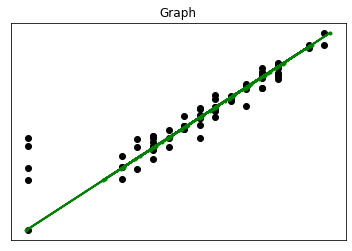

In [15]:
print('---Support Vector Machine (SVR)---\n')
print('---Using student-mat.csv---\n')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# read data from csv using pandas
myData = pd.read_csv('/Users/asifh/Documents/cmpt310/Coding_Assignment_#1/Data/Student-Data/student-mat.csv', sep=';')

# seperate catagoric & numeric columns
cat_cols = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# one_hot_encode to preprocess catagoric & numeric data
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), cat_cols), (StandardScaler(), num_cols[:15]),
    remainder='passthrough'
)
##print(preprocessor)

print('---Same Features & Target(s)---\n')
# select features
# all excluding G3
X = myData.iloc[:395, 1:32]

# select target(s)
# G3
y = myData.iloc[:395, 32:33]

# cross-validation
# 5-folds
cv = KFold(n_splits=5, shuffle=True)

# split training & testing sets
for train, test in cv.split(X, y=y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

# select learner model
# transform X to scalar
# fit data using training set
model = make_pipeline(preprocessor, TransformedTargetRegressor(
        regressor=SVR(kernel='linear'))
        )
model.fit(X_train, y_train)

#transform X_test to scalar 
# predict & print G3
y_pred = model.predict(X_test)
print('\n*Prediction*')
print(y_pred)

# visualization of data
# mean squared error
print('\n*Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
# coefficient of determination/R2: 1 is perfect 
print('\n*R2 Score(Coefficient of determination): %.2f' % r2_score(y_test, y_pred))

# output plot
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_pred, y_pred, color='green', marker='o', linewidth=2, markersize=3)

plt.title('Graph')
plt.xticks(())
plt.yticks(())

plt.show()



## Ensemble Model (Bagging)

Your code here.

---Ensemble (Bagging Regressor)---

---Using student-mat.csv---

---Same Features & Target(s)---


*Prediction*
[[15.5]
 [15.2]
 [ 8.5]
 [11.1]
 [16.3]
 [13.5]
 [ 9.6]
 [18.5]
 [ 8.4]
 [ 9.3]
 [ 8.2]
 [10.4]
 [12. ]
 [ 6.1]
 [10.2]
 [ 7.5]
 [ 1.5]
 [ 6. ]
 [ 6.1]
 [12.7]
 [12.6]
 [18.4]
 [18.3]
 [ 7.8]
 [13.1]
 [ 1.5]
 [12.9]
 [ 6.1]
 [ 8.4]
 [ 0. ]
 [13.2]
 [11.5]
 [ 8.6]
 [10.9]
 [ 1.2]
 [12.5]
 [11.8]
 [ 9.4]
 [13.3]
 [11.9]
 [15.1]
 [ 8.6]
 [ 9.4]
 [ 8.1]
 [10. ]
 [ 8.6]
 [ 9.9]
 [ 0. ]
 [10.9]
 [ 4.3]
 [12.1]
 [ 7.6]
 [ 6.1]
 [ 8.5]
 [13.9]
 [13.2]
 [12.3]
 [13.2]
 [13.6]
 [11.7]
 [10.2]
 [10.5]
 [12.9]
 [ 9.3]
 [14. ]
 [12.2]
 [ 8.9]
 [ 6.6]
 [ 3.8]
 [11.5]
 [15.5]
 [13.3]
 [12.4]
 [ 5.1]
 [18.2]
 [13.6]
 [ 5.4]
 [ 5.3]
 [ 0.6]]

*Mean Squared Error: 4.73

*R2 Score(Coefficient of determination): 0.78


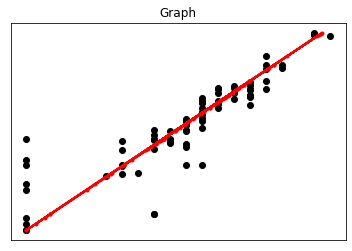

In [16]:
print('---Ensemble (Bagging Regressor)---\n')
print('---Using student-mat.csv---\n')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# read data from csv using pandas
myData = pd.read_csv('/Users/asifh/Documents/cmpt310/Coding_Assignment_#1/Data/Student-Data/student-mat.csv', sep=';')

# seperate catagoric & numeric columns
cat_cols = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# one_hot_encode to preprocess catagoric & numeric data
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), cat_cols), (StandardScaler(), num_cols[:15]),
    remainder='passthrough'
)
##print(preprocessor)

print('---Same Features & Target(s)---\n')
# select features
# all excluding G3
X = myData.iloc[:395, 1:32]

# select target(s)
# G3
y = myData.iloc[:395, 32:33]

# cross-validation
# 5-folds
cv = KFold(n_splits=5, shuffle=True)  # better result w/ shuffle
 
# split training & testing sets
for train, test in cv.split(X, y=y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

# select learner model
# transform X to scalar
# fit data using training set
model = make_pipeline(preprocessor, TransformedTargetRegressor(
        regressor=BaggingRegressor(base_estimator=DecisionTreeRegressor())) # bad result w/ (base_estimator=SVR(), n_estimators=10)
        )
model.fit(X_train, y_train)

#transform X_test to scalar 
# predict & print G3
y_pred = model.predict(X_test)
print('\n*Prediction*')
print(y_pred)

# visualization of data
# mean squared error
print('\n*Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
# coefficient of determination/R2: 1 is perfect 
print('\n*R2 Score(Coefficient of determination): %.2f' % r2_score(y_test, y_pred))

# output plot
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_pred, y_pred, color='red', marker='o', linewidth=2, markersize=3)

plt.title('Graph')
plt.xticks(())
plt.yticks(())

plt.show()



## Ensemble Model (Random Forest)

Your code here.

---Ensemble (Random Forest Regressor)---

---Using student-mat.csv---

---Same Features & Target(s)---


*Prediction*
[[ 6.26]
 [ 7.83]
 [ 9.8 ]
 [13.62]
 [15.33]
 [ 8.61]
 [ 8.7 ]
 [15.44]
 [ 9.93]
 [ 4.37]
 [ 9.6 ]
 [ 8.38]
 [14.77]
 [15.58]
 [ 9.65]
 [ 9.04]
 [ 6.  ]
 [15.36]
 [ 9.6 ]
 [ 7.35]
 [13.18]
 [18.83]
 [14.99]
 [12.89]
 [17.98]
 [15.73]
 [10.44]
 [12.65]
 [12.25]
 [15.15]
 [ 0.92]
 [ 0.9 ]
 [ 8.26]
 [12.7 ]
 [ 9.54]
 [ 7.32]
 [13.46]
 [15.83]
 [ 5.97]
 [ 6.47]
 [ 7.6 ]
 [12.92]
 [ 9.44]
 [ 0.36]
 [10.47]
 [ 3.83]
 [10.32]
 [12.28]
 [ 8.39]
 [15.15]
 [ 3.99]
 [ 9.82]
 [ 8.91]
 [ 5.34]
 [ 9.67]
 [13.88]
 [ 8.09]
 [12.15]
 [14.22]
 [13.58]
 [12.36]
 [11.99]
 [11.2 ]
 [12.69]
 [10.27]
 [15.87]
 [12.61]
 [ 9.93]
 [11.6 ]
 [15.97]
 [10.4 ]
 [12.89]
 [12.68]
 [10.65]
 [ 9.94]
 [12.3 ]
 [10.1 ]
 [15.75]
 [11.84]]

*Mean Squared Error: 1.98

*R2 Score(Coefficient of determination): 0.87


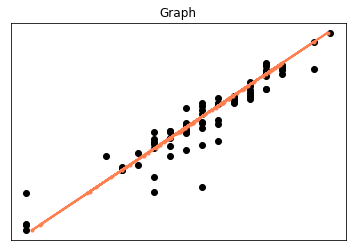

In [17]:
print('---Ensemble (Random Forest Regressor)---\n')
print('---Using student-mat.csv---\n')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# read data from csv using pandas
myData = pd.read_csv('/Users/asifh/Documents/cmpt310/Coding_Assignment_#1/Data/Student-Data/student-mat.csv', sep=';')

# seperate catagoric & numeric columns
cat_cols = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# one_hot_encode to preprocess catagoric & numeric data
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), cat_cols), (StandardScaler(), num_cols[:15]),
    remainder='passthrough'
)
##print(preprocessor)

print('---Same Features & Target(s)---\n')
# select features
# all excluding G3
X = myData.iloc[:395, 1:32]

# select target(s)
# G3
y = myData.iloc[:395, 32:33]

# cross-validation
# 5-folds
cv = KFold(n_splits=5, shuffle=True)

# split training & testing sets
for train, test in cv.split(X, y=y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

# select learner model
# transform X to scalar
# fit data using training set
model = make_pipeline(preprocessor, TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=100))
        )
model.fit(X_train, y_train)

#transform X_test to scalar 
# predict & print G3
y_pred = model.predict(X_test)
print('\n*Prediction*')
print(y_pred)

# visualization of data
# mean squared error
print('\n*Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
# coefficient of determination/R2: 1 is perfect 
print('\n*R2 Score(Coefficient of determination): %.2f' % r2_score(y_test, y_pred))

# output plot
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_pred, y_pred, color='coral', marker='o', linewidth=2, markersize=3)

plt.title('Graph')
plt.xticks(())
plt.yticks(())

plt.show()



# Summary

Your summary here.
Consists of discussion, results, future work, etc.
